<a href="https://colab.research.google.com/github/SantiagoGMari/nuevorp/blob/main/Proyecto_J1006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importan las librerias necesarias

In [54]:
from distutils.filelist import findall
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

Se declara la página sobre la que se va a trabajar

In [55]:
url= "https://www.greatplacetowork.com.ar/los-mejores-lugares-para-trabajar-para-pymes/2022"

Se realiza la extraccion

In [56]:
page= requests.get (url)
soup= BeautifulSoup (page.content, "html.parser")
extraccion= soup.find_all("span",style="color: #292b30;")


Se crea una lista vacía para almacenar los datos extraídos

In [57]:
datos= list()

Se almacenan los datos extraídos dentro de la lista vacía

In [58]:
for i in extraccion:
    datos.append(i.text)

Se extraen los datos de la categoría "Empresa"

In [59]:
empresa=datos[1:100:5]

Se extraen los datos de la categoría "Ubicación"

In [60]:
ubicacion=datos[2:101:5]

Se extraen los datos de la categoría "Rubro"

In [61]:
rubro=datos[3:102:5]

Se extraen los datos de la categoría "Cantidad de Empleados"

In [62]:
cant_emp=datos[4:103:5]

Se procesa el resultado para obtener el formato deseado

In [63]:
num_de_emp=list()
for i in cant_emp:
    num_de_emp.append(i[-2:])

Se crea el Data Frame

In [64]:
df= pd.DataFrame ({'Empresa': empresa, 'Ubicacion': ubicacion, 'Rubro':rubro, 'Cant_Empleados': num_de_emp}, index=list(range(1,21)))

Se imprime el Data Frame

In [65]:
print(df)

                    Empresa                                       Ubicacion  \
1                Growketing                                 CABA, Argentina   
2            Viví Marketing                                 CABA, Argentina   
3                  Bombieri   Concepción del Uruguay, Entre Ríos, Argentina   
4                 Evaluados             Córdoba Capital, Córdoba, Argentina   
5                  PAGOS360             Córdoba Capital, Córdoba, Argentina   
6                  BI Media                                 CABA, Argentina   
7                     ADBOT                                 CABA, Argentina   
8               MobyDigital             Córdoba Capital, Córdoba, Argentina   
9                 Cuponstar                                 CABA, Argentina   
10                  Gen IT                                  CABA, Argentina   
11                  VAREGOS                                 CABA, Argentina   
12           Atlas Shipping                         

Se exporta el Data Frame en formato CSV

In [66]:
df.to_csv("Top20.csv")

Graficos

In [67]:
dat= pd.read_csv("Top20.csv")

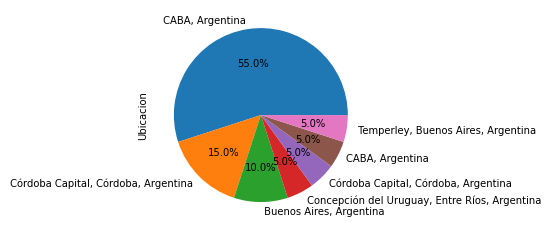

In [68]:
torta_ubic=dat.Ubicacion.value_counts()
torta_ubic.plot.pie(autopct='%1.1f%%')

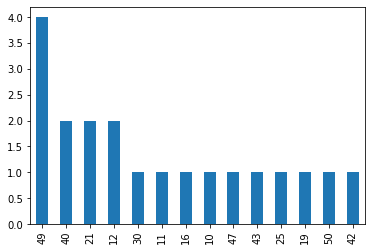

In [69]:
barras_emp=dat.Cant_Empleados.value_counts()
barras_emp.plot.bar()

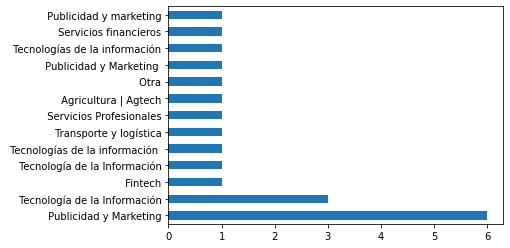

In [70]:
barras_rubro=dat.Rubro.value_counts()
barras_rubro.plot.barh()